In [1]:
import numpy as np
from numpy import dot as dot
from numpy import linalg as linalg
from numpy import diff as diff
from numpy import array as array
from numpy import zeros as zeros
from numpy import ones as ones
from numpy import arange as arange
import matplotlib.pyplot as plt

In [2]:
N = 4 # number of nodes
N_f = 2 # number of free DOF
node2dof = array([2, 1, 4, 3])

In [3]:
T = zeros(N).reshape(N,1) # initialize temperature matrix

In [4]:
grad_N_xieta = array([[-1,-1],[1,0],[0,1]]) # parametric basis functions

conn = array([[4,2,1],[3,2,4]]) # connectivity of the mesh

connbext = array([[2,1]]) # connectivity of the film condition

In [5]:
K = zeros((N_f,N)) # global conductivity
L = zeros((N_f,1)) # global heat load

In [6]:
# Coordinates
x = array([[-0.033, 0],[-0.0286, 0.0165],[-0.0141, 0.00815],[-0.0163, 0]])

In [7]:
k = 51 # W/m^2/K
dZ = 1 # thickness of slice
ho = 125 # film coefficient of exterior
Tw = 90 # water temp, inside of pipe
Ta = -5 # air temp, outside of pipe

zconn = conn -1

In [9]:
for j in arange(zconn.shape[0]):
    J = dot(x[zconn[j,:],:].T, grad_N_xieta) # Jacobian computations
    grad_N = dot(grad_N_xieta, linalg.inv(J)) # x,y, gradients of basis functions
    Ke = (k*dZ*linalg.det(J)/2)*dot(grad_N,grad_N.T) # elementwise matrix
    # element dof array, with index starting at 0
    zedof = array(node2dof[zconn[j,:]])-1
    # Assemble elementwise conductivity matrix.
    for ro in arange(len(zedof)):
        for co in arange(len(zedof)):
            if (zedof[ro] < N_f):
                K[zedof[ro], zedof[co]] = K[zedof[ro], zedof[co]]+ Ke[ro,co]


In [10]:
print(K)

[[ 39.11747825 -19.00909091  -0.04846205 -20.0599253 ]
 [-19.00909091  39.19531845 -20.18622754   0.        ]]


In [11]:
H = zeros((N_f,N)) # global film condition matrix
zconn = connbext - 1
for j in arange(zconn.shape[0]):
    he = linalg.norm(diff(x[zconn[j,:],:], axis=0))
    zedof = array(node2dof[zconn[j,:]])-1
    He = ho*dZ*he/6*array([[2,1],[1,2]])
    for ro in arange(len(zedof)):
        for co in arange(len(zedof)):
            if (zedof[ro] < N_f):
                H[zedof[ro], zedof[co]] = H[zedof[ro], zedof[co]]+ He[ro,co]
    Lea = Ta*ho*he*dZ/2*array([[1],[1]])
    for ro in arange(len(zedof)):
        if (zedof[ro] < N_f):
            L[zedof[ro]] = L[zedof[ro]] + Lea[ro]

In [12]:
print(H) # print film condition matrix.
print(L)

[[0.71152467 0.35576234 0.         0.        ]
 [0.35576234 0.71152467 0.         0.        ]]
[[-5.33643505]
 [-5.33643505]]


In [15]:
LQ = array([[1811.8],[1804.6]])

print(LQ) # print heat load vector. 


[[1811.8]
 [1804.6]]


In [16]:
T[0:N_f] = linalg.solve(K[0:N_f, 0:N_f] + H[0:N_f, 0:N_f], LQ)
T[2] = Tw
T[3] = Tw
print('T=', T)

T= [[85.35219501]
 [85.11579147]
 [90.        ]
 [90.        ]]


In [17]:
for index in arange(node2dof.shape[0]):
    print('Node', index + 1, 'T=', T[node2dof[index] - 1])

Node 1 T= [85.11579147]
Node 2 T= [85.35219501]
Node 3 T= [90.]
Node 4 T= [90.]


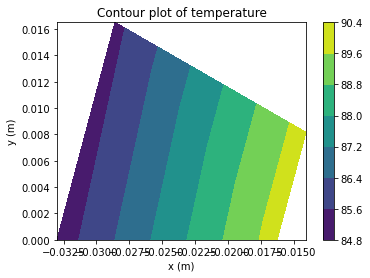

In [18]:
# Plot filled contours
plt.figure()
plt.gca().set_aspect('equal')
# setup three 1-d arrays for the x-coordinate, the y-coordinate, and the
# z-coordinate
xs = x[:, 0].reshape(N,)  # one value per node
ys = x[:, 1].reshape(N,)  # one value per node
ix = node2dof[arange(N)] - 1
zs = (T[ix]).reshape(N,)  # one value per node
triangles = conn - 1  # the triangles are defined by the connectivity arrays
plt.tricontourf(xs, ys, triangles, zs)
plt.colorbar()
plt.title('Contour plot of temperature')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

In [22]:
print(Ke[0,:])

[ 79.09678128 -20.0599253  -59.03685598]
